<a href="https://colab.research.google.com/github/ershooooo/MO_labs_1/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#Раздел 1

#Загрузка данных

In [ ]:
#Установка и импорт библиотек
!pip install pandas
import pandas as pd
!pip install seaborn
import seaborn as sns
!pip install matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
#Подключение к диску
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
#Чтение файлов
dfG1 = pd.read_csv("/content/drive/MyDrive/MO_labs/Plant_1_Generation_Data.csv")
#Перевод типа данных в тип даты
dfG1['DATE_TIME']=pd.to_datetime(dfG1['DATE_TIME'])
dfW1 = pd.read_csv("/content/drive/MyDrive/MO_labs/Plant_1_Weather_Sensor_Data.csv")
dfW1['DATE_TIME']=pd.to_datetime(dfW1['DATE_TIME'])
dfG2 = pd.read_csv("/content/drive/MyDrive/MO_labs/Plant_2_Generation_Data.csv")
dfG2['DATE_TIME']=pd.to_datetime(dfG2['DATE_TIME'])
dfW2 = pd.read_csv("/content/drive/MyDrive/MO_labs/Plant_2_Weather_Sensor_Data.csv")
dfW2['DATE_TIME']=pd.to_datetime(dfW2['DATE_TIME'])

In [ ]:
#Объединение таблиц
dfGeneration = pd.concat([dfG1,dfG2],ignore_index=True)
dfWeather = pd.concat([dfW1,dfW2],ignore_index=True)

In [ ]:
#Проверка нулевых значений
dfGeneration.isnull().sum().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [ ]:
#Проверка нулевых значений
dfWeather.isnull().sum().sum()

0

In [ ]:
#Группировка числа значений
dfGeneration.groupby('PLANT_ID').nunique()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
PLANT_ID,,,,,,
4135001,3158,22,32909,32686,29900,37267
4136001,3259,22,30825,30783,30490,33115


In [ ]:
#Группировка числа значений
dfWeather.groupby('PLANT_ID').nunique()

,DATE_TIME,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
PLANT_ID,,,,,
4135001,3182,1,3182,3182,1758
4136001,3259,1,3259,3259,1863


In [ ]:
dfWeather

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0    2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1    2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2    2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3    2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4    2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   
...                  ...       ...              ...                  ...   
6436 2020-06-17 22:45:00   4136001  iq8k7ZNt4Mwm3w0            23.511703   
6437 2020-06-17 23:00:00   4136001  iq8k7ZNt4Mwm3w0            23.482282   
6438 2020-06-17 23:15:00   4136001  iq8k7ZNt4Mwm3w0            23.354743   
6439 2020-06-17 23:30:00   4136001  iq8k7ZNt4Mwm3w0            23.291048   
6440 2020-06-17 23:45:00   4136001  iq8k7ZNt4Mwm3w0            23.202871   

      MODULE_TEMPERATURE  IRRADIATION  
0              22.857507          0.0  
1              22.761668          0.0  
2              22.592306          0.0  
3              22.360852          0.0  
4              22.165423          0.0  
...                  ...          ...  
6436           22.856201          0.0  
6437           22.744190          0.0  
6438           22.492245          0.0  
6439           22.373909          0.0  
6440           22.535908          0.0  

[6441 rows x 6 columns]

In [ ]:
#Преобразование "переплавка" таблицы
df_Weather_diagrams = dfWeather.melt(id_vars=['PLANT_ID'],value_vars=['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION'])

In [ ]:
dfWeather

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0    2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1    2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2    2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3    2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4    2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   
...                  ...       ...              ...                  ...   
6436 2020-06-17 22:45:00   4136001  iq8k7ZNt4Mwm3w0            23.511703   
6437 2020-06-17 23:00:00   4136001  iq8k7ZNt4Mwm3w0            23.482282   
6438 2020-06-17 23:15:00   4136001  iq8k7ZNt4Mwm3w0            23.354743   
6439 2020-06-17 23:30:00   4136001  iq8k7ZNt4Mwm3w0            23.291048   
6440 2020-06-17 23:45:00   4136001  iq8k7ZNt4Mwm3w0            23.202871   

      MODULE_TEMPERATURE  IRRADIATION  
0              22.857507          0.0  
1              22.761668          0.0  
2              22.592306          0.0  
3              22.360852          0.0  
4              22.165423          0.0  
...                  ...          ...  
6436           22.856201          0.0  
6437           22.744190          0.0  
6438           22.492245          0.0  
6439           22.373909          0.0  
6440           22.535908          0.0  

[6441 rows x 6 columns]

In [ ]:
#Просмотр результата
df_Weather_diagrams

PLANT_ID             variable      value
0       4135001  AMBIENT_TEMPERATURE  25.184316
1       4135001  AMBIENT_TEMPERATURE  25.084589
2       4135001  AMBIENT_TEMPERATURE  24.935753
3       4135001  AMBIENT_TEMPERATURE  24.846130
4       4135001  AMBIENT_TEMPERATURE  24.621525
...         ...                  ...        ...
19318   4136001          IRRADIATION   0.000000
19319   4136001          IRRADIATION   0.000000
19320   4136001          IRRADIATION   0.000000
19321   4136001          IRRADIATION   0.000000
19322   4136001          IRRADIATION   0.000000

[19323 rows x 3 columns]

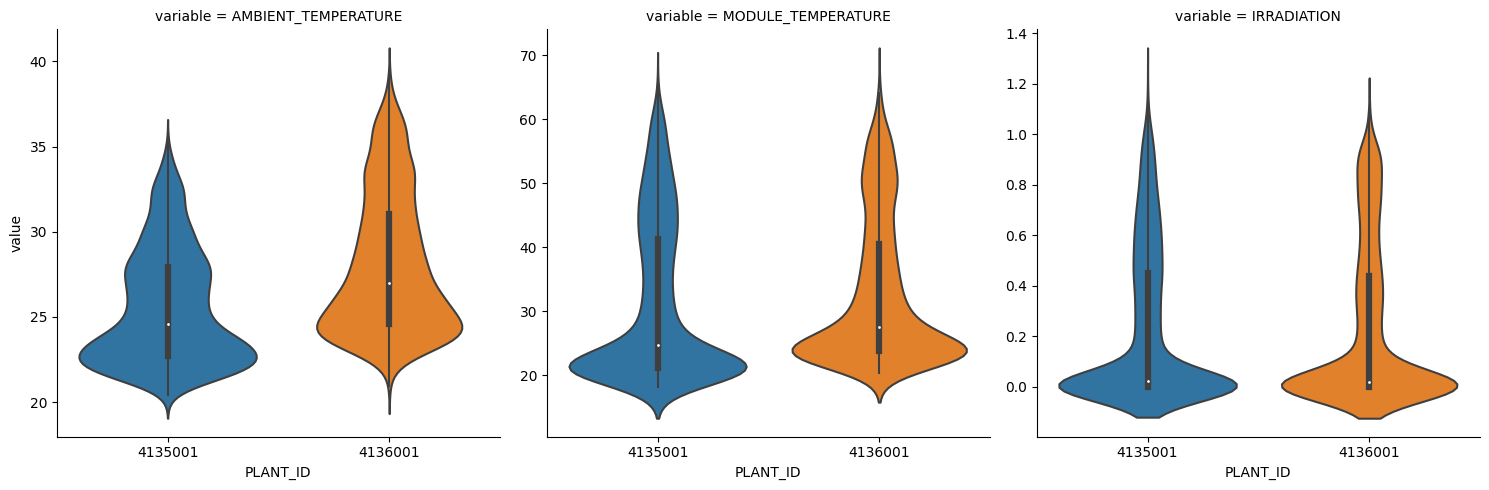

In [ ]:
#Построение скрипичного графика
sns.catplot(data=df_Weather_diagrams, x="PLANT_ID", y='value', col='variable',kind='violin', sharey=False)

In [ ]:
q = [0, 1/4, 1/2, 3/4, 1]
dfWeather['AMBIENT_TEMPERATURE'].quantile(q=q)

0.00    20.398505
0.25    23.662696
0.50    25.954460
0.75    29.355584
1.00    39.181638
Name: AMBIENT_TEMPERATURE, dtype: float64

In [ ]:
q = [0, 1/4, 1/2, 3/4, 1]
dfWeather.groupby('PLANT_ID')['AMBIENT_TEMPERATURE'].quantile([1/4])

PLANT_ID      
4135001   0.25    22.705182
4136001   0.25    24.602135
Name: AMBIENT_TEMPERATURE, dtype: float64

In [ ]:

#Раздел 2

#Интерактивные таблицы Itables

In [ ]:
#Установка и импорт библиотек
!pip install itables
import itables as imp
from itables import init_notebook_mode,show
init_notebook_mode(all_interactive=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.9 MB/s eta 0:00:00


In [ ]:
#Построение интерактивной таблицы по данным электрогенерации
imp.show(dfGeneration)

In [ ]:
#Поиск данных, относящихся к 1BY6WEcLGh8j5v7
show(dfGeneration,search={'regex':True,'caseInsensitive':True,'search':'1BY6WEcLGh8j5v7'})

In [ ]:
#Импорт библиотек
from itables.downsample import nbytes
import itables.options as opt
#Задаем параметры выборки
opt.maxBytes = 6000
#Просмотр результата
show(dfGeneration)

In [ ]:

#Раздел 3

#Интерактивные графики plotly

In [ ]:
#Группируем данные
df_2=dfWeather.groupby(['DATE_TIME','PLANT_ID'],as_index=False)['IRRADIATION'].mean()
#Задаем имя
df_2['name']='IRRADIATION'
#Переименовываем колонку
df_2.rename(columns={'IRRADIATION':'value'},inplace=True)

df_1=dfGeneration.groupby(['DATE_TIME','PLANT_ID'],as_index=False)['AC_POWER'].mean()
df_1['name']='AC_POWER'
df_1.rename(columns={'AC_POWER':'value'},inplace=True)

#Слияние таблиц
df_3=pd.concat([df_2,df_1],ignore_index=True)

#Создание линейчатого графика
fig = px.line(df_3, x='DATE_TIME',y='value',color='PLANT_ID',facet_col='name',facet_col_wrap=1)
#color - категории данных
#facet_col - атрибут, по которому производить разделение
#facet_col_wrap - количество графиков на одной оси (строке)

#создаем независимость вертикальных осей от Y
fig.update_yaxes(matches=None)
fig.show()

In [ ]:
#Создание графика зависимости мощности от температуры инвертора

#Группируем данные
df_2_2=dfWeather.groupby(['DATE_TIME','PLANT_ID'],as_index=False)['MODULE_TEMPERATURE'].mean()
#Задаем имя
df_2_2['name']='MODULE_TEMPERATURE'
#Переименовываем колонку
df_2_2.rename(columns={'MODULE_TEMPERATURE':'value'},inplace=True)

#Слияние таблиц
df_3_2=pd.concat([df_2_2,df_1],ignore_index=True)
#Создание линейчатого графика
fig = px.line(df_3_2, x='DATE_TIME',y='value',color='PLANT_ID',facet_col='name',facet_col_wrap=1)

#Cоздаем независимость вертикальных осей от Y
fig.update_yaxes(matches=None)
fig.show()

In [ ]:
#Создание графика зависимости мощности от температуры окружающей среды

#Группируем данные
df_2_3=dfWeather.groupby(['DATE_TIME','PLANT_ID'],as_index=False)['AMBIENT_TEMPERATURE'].mean()
#Задаем имя
df_2_3['name']='AMBIENT_TEMPERATURE'
#Переименовываем колонку
df_2_3.rename(columns={'AMBIENT_TEMPERATURE':'value'},inplace=True)

#Слияние таблиц
df_3_3=pd.concat([df_2_3,df_1],ignore_index=True)
#Создание линейчатого графика
fig = px.line(df_3_3, x='DATE_TIME',y='value',color='PLANT_ID',facet_col='name',facet_col_wrap=1)

#Cоздаем независимость вертикальных осей от Y
fig.update_yaxes(matches=None)
fig.show()

In [ ]:

#Раздел 4

#Парные графики в seaborn

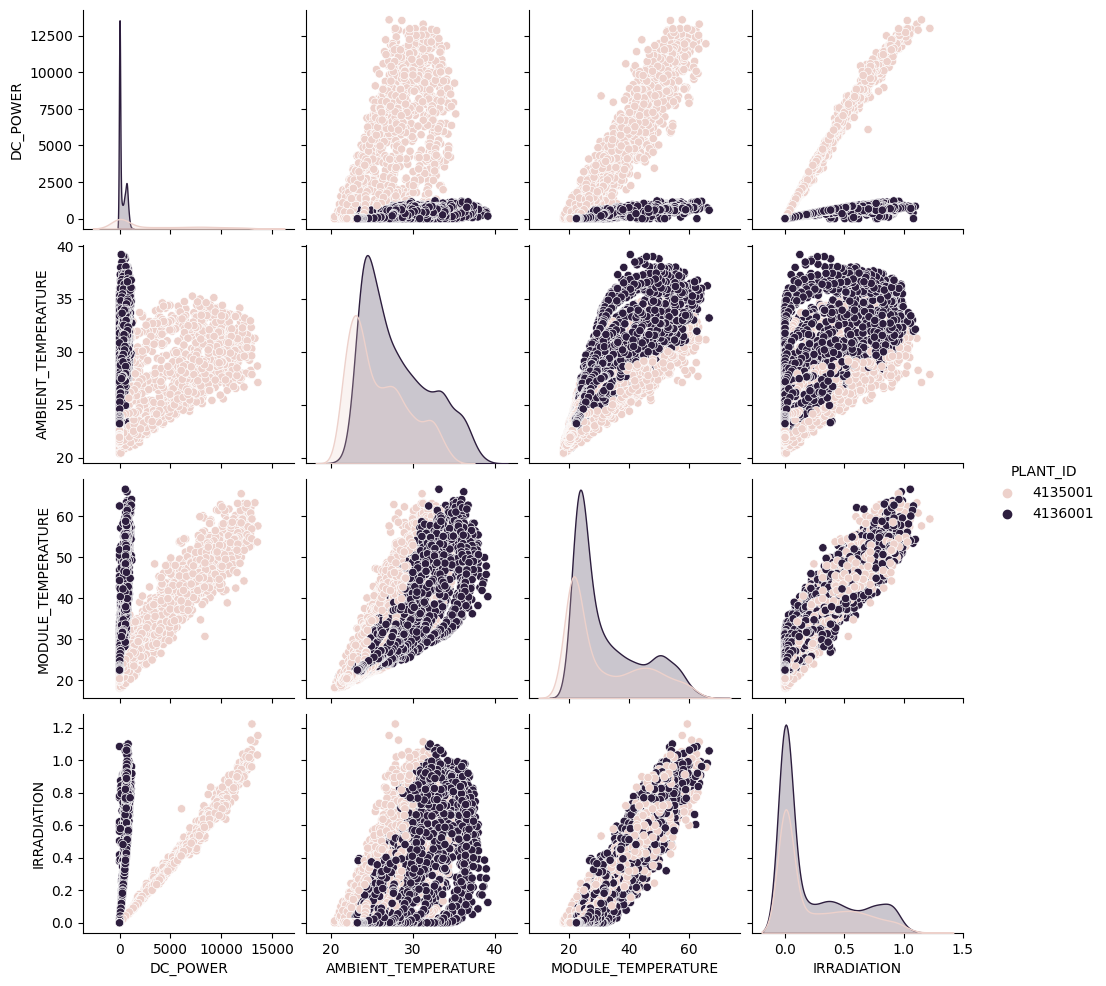

In [ ]:
#Объединение данных по генерации энергии и показания погодных датчиков в одну таблицу
power_and_weather = pd.merge(left=dfGeneration.groupby(["DATE_TIME", "PLANT_ID"], as_index=False)["DC_POWER"].mean(),
                             right=dfWeather,on=["DATE_TIME", "PLANT_ID"])

#Построение графика попарной взаимосвязи
sns.pairplot(power_and_weather,hue='PLANT_ID')


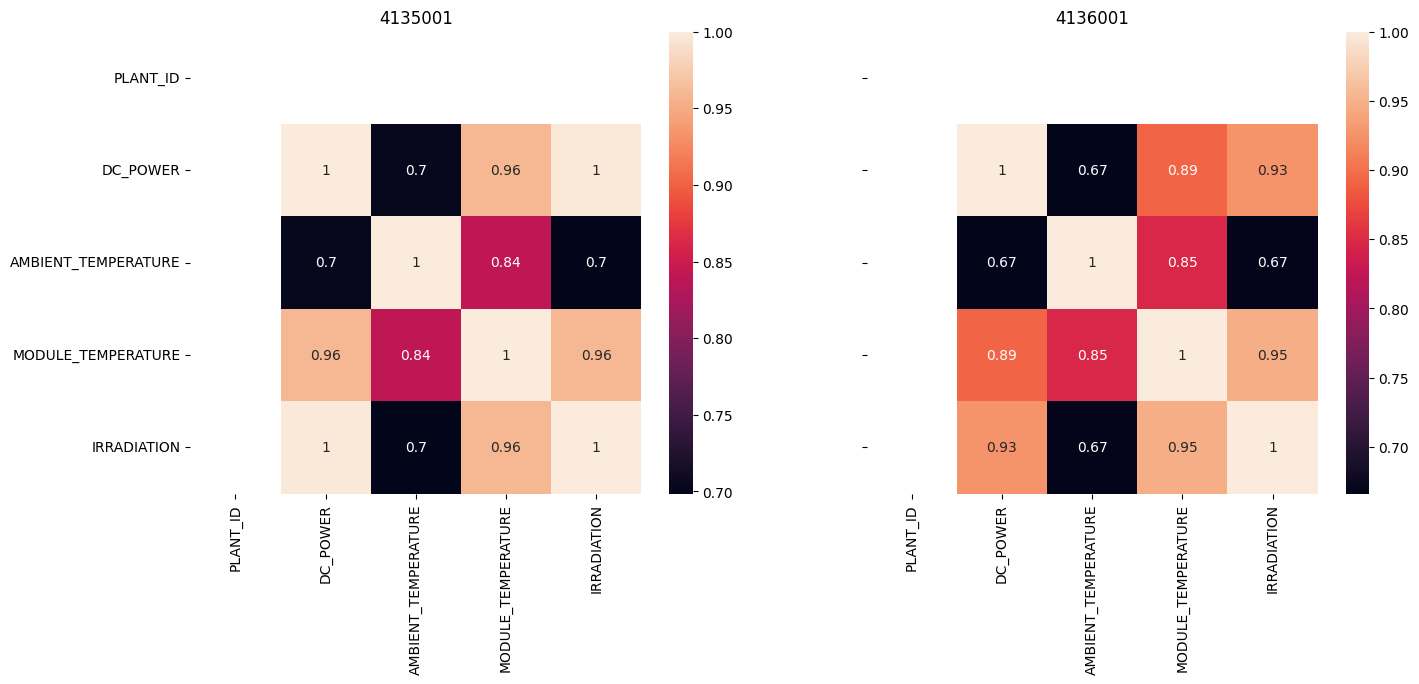

In [ ]:
#Построение тепловой карты

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(16, 6), sharey=True)
#nrows - количество строк
#ncols - количество столбцов
#figsize - ширина и высота
#sharey - управляет совместным использованием свойств между осями y (общая ось)

for ax, (plant_id, plant_subset) in zip(axs, power_and_weather.groupby("PLANT_ID")):

#Исключение столбца 'PLANT_ID' из анализа корреляции
    plant_subset_num=plant_subset.select_dtypes(include=[float,int])

#Построение тепловой карты для текущей площадки
    sns.heatmap(plant_subset_num.corr(),annot=True,ax=ax)
#annot=True - запись значения данных в каждую ячейку

    ax.set_title(plant_id)

In [ ]:

#Раздел 5

#Корни квадратного уравнения


In [ ]:
#Импорт библиотек
from itertools import product
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
#Функция вычисления корней квадратного уравнения

def roots_of_square_eqs(a, b, c):
    descr = b*b-4*a*c
    if descr < 0:
        return math.nan, math.nan
    x1 = (-b - math.sqrt(descr))/2/a
    x2 = (-b + math.sqrt(descr))/2/a
    return x1, x2

In [ ]:
#Проверка функции вычисления корней квадратного уравнения

roots_of_square_eqs(2, -9, 4)

(0.5, 4.0)

In [ ]:
#Генерируем таблицу с коэффициентами и корнями квадратного уравнения

#создание массива параметров
maths_kv=[]
x = np.linspace(-5, 5,10)
#-5 начальное число
#5 конечное число
#10 количество образцов для генерации.


#обработка итераторов
for a, b, c in product(x, x, x):
    x1, x2 =  roots_of_square_eqs(a, b, c)
    maths_kv.append({"a":a, "b":b, "c": c, "x1": x1, "x2": x2})


#product - Repeat: это необязательный параметр, который принимает в качестве значения целые числа.
#При использовании он возвращает декартовое произведение итерации с самим собой за количество раз, указанное в параметре repeat

#Просмотр
maths_kv

[{'a': -5.0, 'b': -5.0, 'c': -5.0, 'x1': nan, 'x2': nan},
 {'a': -5.0, 'b': -5.0, 'c': -3.888888888888889, 'x1': nan, 'x2': nan},
 {'a': -5.0, 'b': -5.0, 'c': -2.7777777777777777, 'x1': nan, 'x2': nan},
 {'a': -5.0, 'b': -5.0, 'c': -1.6666666666666665, 'x1': nan, 'x2': nan},
 {'a': -5.0,
  'b': -5.0,
  'c': -0.5555555555555554,
  'x1': -0.12732200375003502,
  'x2': -0.872677996249965},
 {'a': -5.0,
  'b': -5.0,
  'c': 0.5555555555555554,
  'x1': 0.10092521257733153,
  'x2': -1.1009252125773314},
 {'a': -5.0,
  'b': -5.0,
  'c': 1.666666666666667,
  'x1': 0.26376261582597343,
  'x2': -1.2637626158259736},
 {'a': -5.0,
  'b': -5.0,
  'c': 2.7777777777777786,
  'x1': 0.39752746785575077,
  'x2': -1.3975274678557508},
 {'a': -5.0,
  'b': -5.0,
  'c': 3.8888888888888893,
  'x1': 0.5137937550497034,
  'x2': -1.5137937550497034},
 {'a': -5.0,
  'b': -5.0,
  'c': 5.0,
  'x1': 0.6180339887498949,
  'x2': -1.618033988749895},
 {'a': -5.0, 'b': -3.888888888888889, 'c': -5.0, 'x1': nan, 'x2': nan}

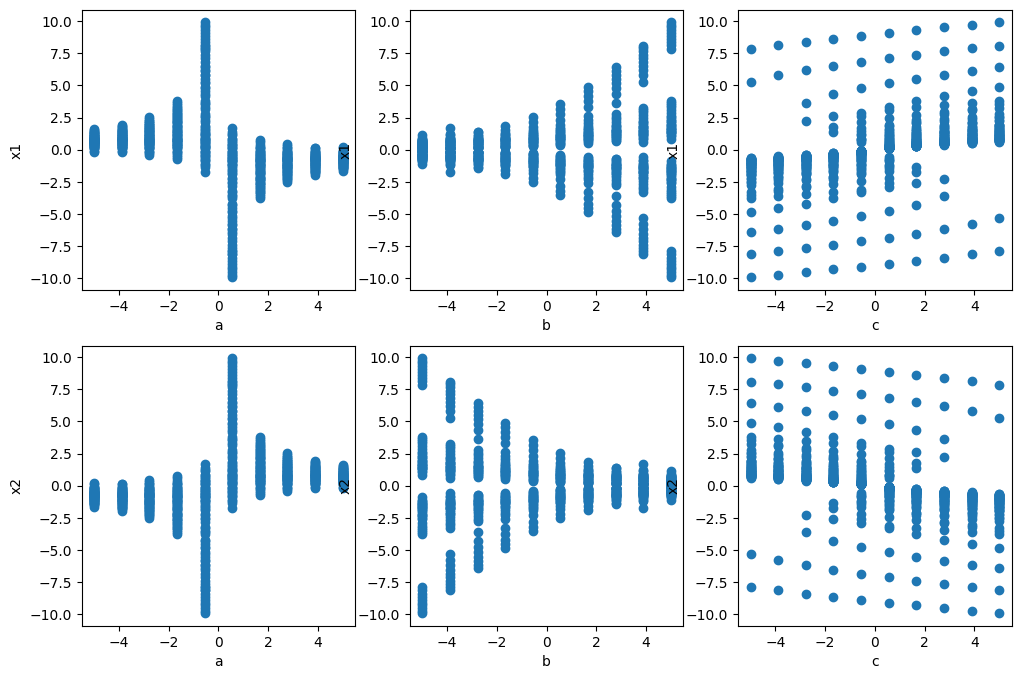

In [ ]:
#Построение 6 графиков, показывающих значение корней от каждого коэффициента

#Создание Дата Фрейм
table_maths_kv = pd.DataFrame(maths_kv)

#Возможность создания нескольких графиков на одном полотне
fig, axs = plt.subplots (nrows=2, ncols=3, figsize=(12,8))


for i, coeff_name in enumerate(["a", "b", "c"]):
  for j, root_name in enumerate(["x1", "x2"]):
    ax = axs[j, i]
    ax.scatter(table_maths_kv[coeff_name],
               table_maths_kv[root_name])
    ax.set_xlabel(coeff_name)
    ax.set_ylabel(root_name)


#i - индекс столбца
#j - индекс строк
#scatter() - диаграмма рассеивания

plt.show()

In [ ]:
#Построение трехмерных графиков

c =[0.2, 0.4, 0.6, 0.8, 1.0]

# Построение первого графика
fig1 = px.scatter_3d(table_maths_kv, x='a', y='b', z='x2', color='c')
fig1.show()

# Построение второго графика
fig2 = px.scatter_3d(table_maths_kv, x='a', y='b', z='x1', color='c')
fig2.show()

In [ ]:
#Вывод таблицы где 4135001 имеют значения 0
df_3

DATE_TIME  PLANT_ID  value         name
0     2020-05-15 00:00:00   4135001    0.0  IRRADIATION
1     2020-05-15 00:00:00   4136001    0.0  IRRADIATION
2     2020-05-15 00:15:00   4135001    0.0  IRRADIATION
3     2020-05-15 00:15:00   4136001    0.0  IRRADIATION
4     2020-05-15 00:30:00   4135001    0.0  IRRADIATION
...                   ...       ...    ...          ...
12853 2020-12-06 22:45:00   4135001    0.0     AC_POWER
12854 2020-12-06 23:00:00   4135001    0.0     AC_POWER
12855 2020-12-06 23:15:00   4135001    0.0     AC_POWER
12856 2020-12-06 23:30:00   4135001    0.0     AC_POWER
12857 2020-12-06 23:45:00   4135001    0.0     AC_POWER

[12858 rows x 4 columns]

In [ ]:
df_3[df_3['value']==0].groupby('PLANT_ID').size()

PLANT_ID
4135001    2895
4136001    2934
dtype: int64

In [ ]:
count_zero = (df_3['PLANT_ID'] == '4135001') & (df_3['value'] == 0)
zero_count = count_zero.size()

print(zero_count)

TypeError: ignored